# Telemarketing data analysis

##### En este jupyter notebook resolveremos el caso 2 propuesto en la asignatura Data Exploration del executive máster of business analytics de ESADE.
##### El objetivo es optimizar la estrategia de negocio y aumentar la efectividad del plan de marketing. Para ello se analizan los datos de la última campaña de telemarketing para buscar respuesta a las siguientes preguntas de negocio:
#####   1 - Who the bank is targeting with its campaigns? 
#####   2 - Argue if the bank telemarketing strategy is appropriate. 
#####   3 - Profile the customers with higher likelihood of conversion and compare it with current bank targeting.

## 1.- Importación de librerías

In [2]:
import pandas as pd
import seaborn as sns

In [3]:
df_raw = pd.read_csv('bank-full_clean.csv')

In [4]:
df = df_raw

## 2.- EDA

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40841 entries, 0 to 40840
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              40841 non-null  int64  
 1   job              40841 non-null  object 
 2   marital          40841 non-null  object 
 3   education        40841 non-null  object 
 4   default          40841 non-null  object 
 5   balance          40841 non-null  int64  
 6   housing          40841 non-null  object 
 7   loan             40841 non-null  object 
 8   day              40841 non-null  int64  
 9   month            40841 non-null  object 
 10  duration         40841 non-null  float64
 11  campaign         40841 non-null  int64  
 12  pdays            40841 non-null  int64  
 13  previous         40841 non-null  int64  
 14  poutcome         40841 non-null  object 
 15  response         40841 non-null  object 
 16  response_binary  40841 non-null  int64  
 17  month_int   

<Axes: xlabel='pdays', ylabel='Count'>

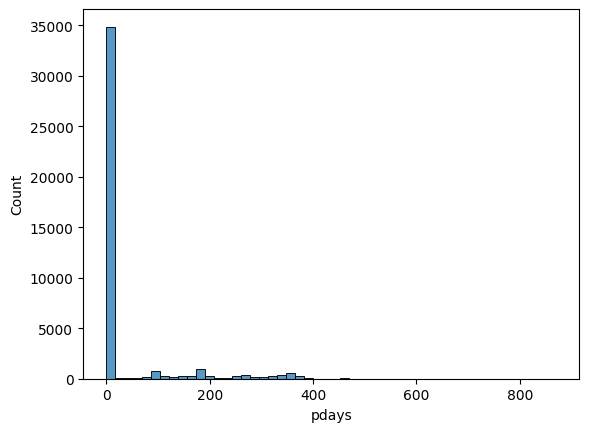

In [ ]:
# Qué significa -1???
sns.histplot(df['pdays'], bins = 50)

In [ ]:
# The number of contacts performed during this campaign for the individual (numeric).
print(df['campaign'].sort_values().value_counts())
# Por qué hay gente a quien se llamó 58 veces?!

campaign
1     15788
2     11306
3      4954
4      3241
5      1606
6      1169
7       649
8       489
9       288
10      248
11      180
12      145
13      123
14       84
15       82
16       75
17       64
18       45
19       43
20       39
21       34
23       20
24       20
22       20
25       19
28       16
29       13
26       12
31       10
27        9
32        9
30        8
33        6
36        4
34        4
35        3
38        3
41        2
43        2
50        2
37        1
39        1
44        1
46        1
51        1
55        1
58        1
Name: count, dtype: int64


<Axes: xlabel='duration', ylabel='Count'>

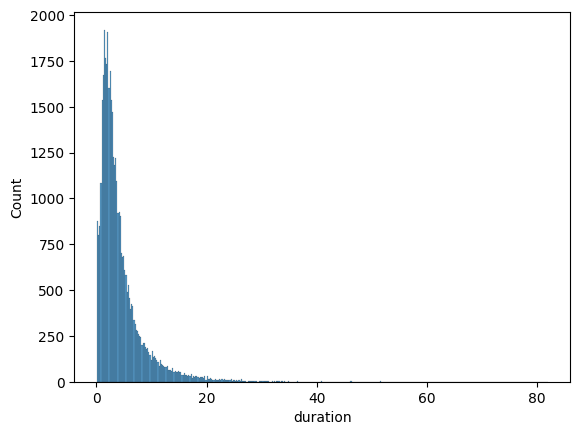

In [ ]:
sns.histplot(df['duration'])

In [ ]:
print(df['duration'].value_counts())

duration
1.50     168
2.07     167
1.48     166
1.73     166
2.03     163
        ... 
18.55      1
28.02      1
23.48      1
25.60      1
25.93      1
Name: count, Length: 1539, dtype: int64


In [30]:
print(df['month'].value_counts()) 

month
may    12496
jul     6520
aug     5877
jun     4853
nov     3483
apr     2529
feb     2258
jan     1183
oct      605
sep      457
mar      407
dec      173
Name: count, dtype: int64


In [29]:
print(df['loan'].value_counts()) 

loan
no     34042
yes     6799
Name: count, dtype: int64


In [ ]:
print(df['housing'].value_counts()) #Crédito hipotecario

housing
yes    22820
no     18021
Name: count, dtype: int64


In [ ]:
print(df['balance'].value_counts()) #cantidad de dinero del cliente en el banco

balance
0       3272
1        183
2        149
4        131
3        125
        ... 
3390       1
9881       1
2534       1
2113       1
9299       1
Name: count, Length: 6350, dtype: int64


In [ ]:
print(df['default'].value_counts()) #Deudor de pagos de tarjeta de crédito

default
no     40078
yes      763
Name: count, dtype: int64


In [25]:
print(df['education'].value_counts())

education
secondary    21933
tertiary     12380
primary       6528
Name: count, dtype: int64


In [24]:
print(df['marital'].value_counts())

marital
married     24641
single      11443
divorced     4757
Name: count, dtype: int64


In [ ]:
print(df['job'].value_counts())
df['job'] = [x.replace('.','') for x in df['job']]

job
blue-collar      8805
management       8565
technician       6954
admin            4705
services         3801
retired          2020
self-employed    1443
entrepreneur     1340
unemployed       1212
housemaid        1149
student           689
other             158
Name: count, dtype: int64


In [56]:
len(df)

40841

In [ ]:
print(df.groupby('response')['poutcome'].value_counts(normalize=True))
print(df.groupby('response')['poutcome'].value_counts(normalize=False))

response  poutcome
no        unknown     0.873930
          failure     0.112397
          success     0.013673
yes       unknown     0.682044
          success     0.193145
          failure     0.124811
Name: proportion, dtype: float64
response  poutcome
no        unknown     31638
          failure      4069
          success       495
yes       unknown      3164
          success       896
          failure       579
Name: count, dtype: int64


In [59]:
print(df['response'].value_counts(normalize=True))

response
no     0.886413
yes    0.113587
Name: proportion, dtype: float64


Tasa de conversión de la campaña: 11,35%

response: Clasificación binaria -> Si es "yes" es porque accedió a la oferta y contrató el producto ofrecido. Si es "no", rechazó la oferta
poutcome: Clasificación multiclase -> Si es "success" es porque en la campaña anterior, accedió a la oferta y contrató el producto ofrecido. Si es "failure" es que rechazó la oferta y si es "unknown" es que no fué contactado para la oferta en esa la campaña anterior.

-- Análisis de los pares response&poutcome
(77.47%) Response NO, Poutcome UNKNOWN -> Prospectos nuevos que no aceptaron la oferta.
(9.96%) Response NO, Poutcome FAILURE -> No compró antes y no compró ahora. Quienes son?
(1.21%) Response NO, Poutcome SUCCESS -> Compró antes y no compró ahora. En qué fallamos?
(7.75%) Response YES, Poutcome UNKNOWN -> Prospectos nuevos que aceptaron la oferta. Que hicimos bien?
(2.19%) Response YES, Poutcome FAILURE -> No contrató antes y ahora sí contrata. Qué cambió?
(1.42%) Response YES, Poutcome SUCCESS -> Contrató antes y ahora también. Clientes gold



## 3.- First question: Who the bank is targeting with its campaigns? 

Interpretación de la pregunta: La base de datos de la que disponemos contiene prospectos que se han intentado contactar para esta campaña, por lo cual estos representan al público objetivo de la empresa. Analizar demográficamente este público responde esta primera interrogante.

In [ ]:
columnas_sociodemograficas = ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing','loan']

## 4.- Argue if the bank telemarketing strategy is appropriate. 

## 5 - Profile the customers with higher likelihood of conversion and compare it with current bank targeting.